In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [41]:
# Load the os library
import os

# Load the request module
import urllib.request

# Import SSL which we need to setup for talking to the HTTPS server
import ssl
ssl._create_default_https_context = ssl._create_unverified_context



In [44]:
files = os.listdir('cat1000')# img.<tab>
import matplotlib.pyplot as plt
import numpy as np

print(os.path.join('cat1000', files[0]))
plt.imread(os.path.join('cat1000', files[0]))

files = [os.path.join('cat1000', file_i)
 for file_i in os.listdir('cat1000')
 if '.jpg' in file_i]

# There should be 100 files, with the last one being number 99

img = plt.imread(files[99])

print(img)

cat1000/63.jpg
[[[147 113 103]
  [134 100  88]
  [127  96  76]
  ...
  [169 155  82]
  [160 146  73]
  [156 142  69]]

 [[141 107  97]
  [126  94  79]
  [117  86  66]
  ...
  [166 149  77]
  [162 145  75]
  [164 147  75]]

 [[138 106  93]
  [126  94  79]
  [114  83  63]
  ...
  [170 151  82]
  [168 149  81]
  [173 154  85]]

 ...

 [[138 125  91]
  [159 146 112]
  [185 170 139]
  ...
  [246 234 196]
  [249 237 199]
  [254 242 204]]

 [[152 139 105]
  [160 147 113]
  [178 163 132]
  ...
  [252 240 200]
  [248 236 196]
  [249 237 197]]

 [[169 156 122]
  [166 153 119]
  [175 160 129]
  ...
  [243 231 189]
  [233 221 179]
  [236 224 182]]]


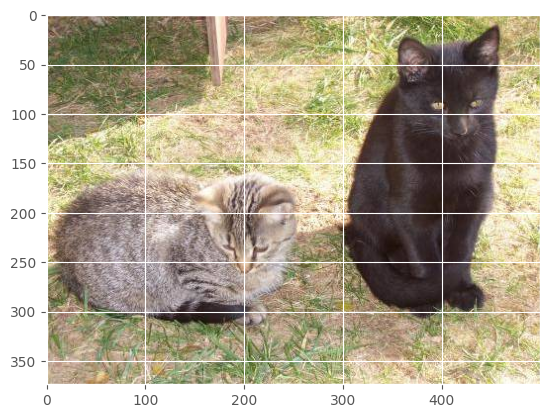

In [6]:
# If nothing is drawn and you are using notebook, try uncommenting the next line:
#%matplotlib inline
plt.imshow(img)

In [7]:
img.shape
# (374, 500, 3)

(374, 500, 3)

This means that the image has 374 rows, 500 columns, and 3 color channels corresponding to the Red, Green, and Blue channels of the image, or RGB. 

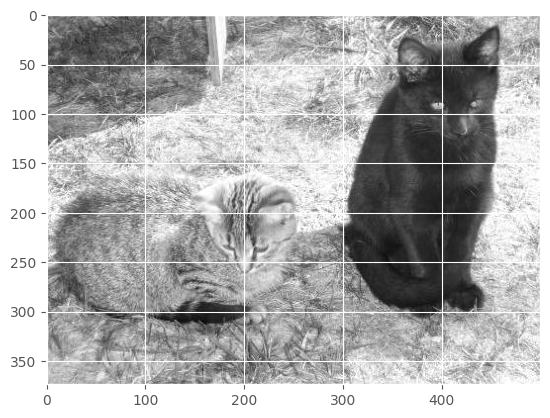

In [8]:
plt.imshow(img[:, :, 0], cmap='gray') # Red Channel

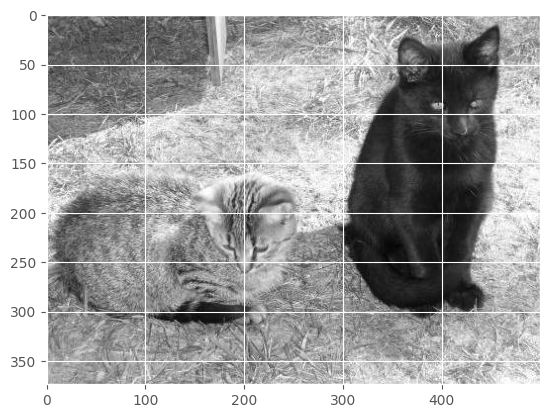

In [9]:
plt.imshow(img[:, :, 1], cmap='gray') # Green Channel

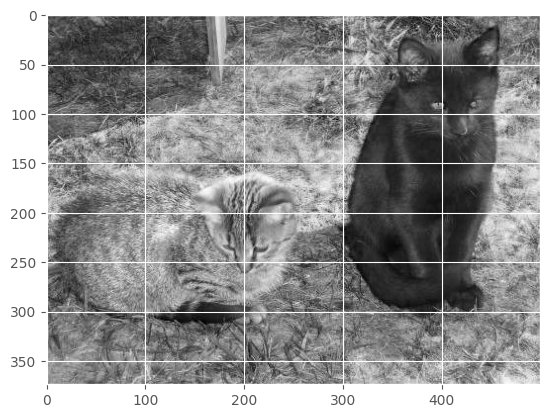

In [10]:
plt.imshow(img[:, :, 2], cmap='gray') # Blue Channel

We use the special colon operator to say take every value in this dimension. This is saying, give me every row, every column, and the 0th dimension of the color channels. What we're seeing is the amount of Red, Green, or Blue contributing to the overall color image.

In [11]:
imgs = [plt.imread(files[file_i])
        for file_i in range(100)]

#imgs = utils.get_celeb_imgs() # nope nope nope

We now have a list containing our images. Each index of the imgs list is another image which we can access using the square brackets:

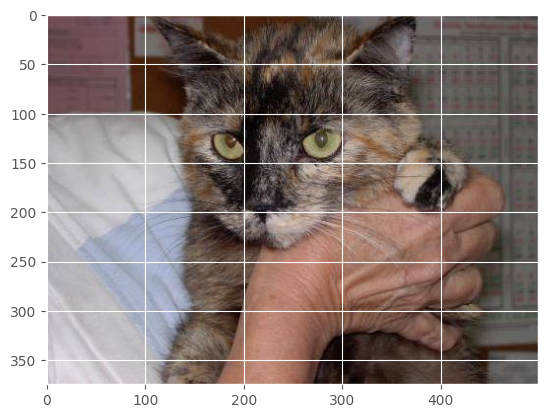

In [24]:
plt.imshow(imgs[78])

# Flip the image up and down

This is done using array slicing, moving the last row of the image to the first row, the penultimate row to the second row and the first row to the penultimate row.

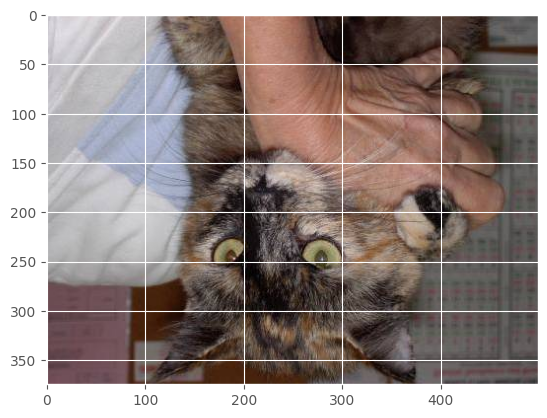

In [26]:
imgud = imgs[78][::-1, :, :]
plt.imshow(imgud)

# Screenshot of the bottom half of the image

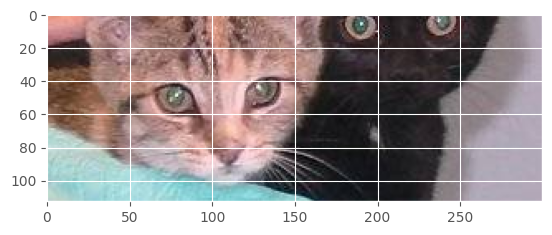

In [27]:
h = imgs[66].shape[0] // 2
imgh = imgs[66][h:, :, :]
plt.imshow(imgh)

# Adjust brightness to half the original

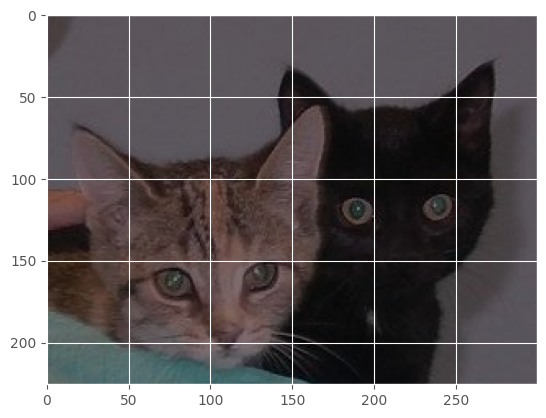

In [28]:
imgb = imgs[66] * 0.5
plt.imshow(imgb.astype('uint8'))

# interval row sampling

The image size will be halved and the sharpness will deteriorate.

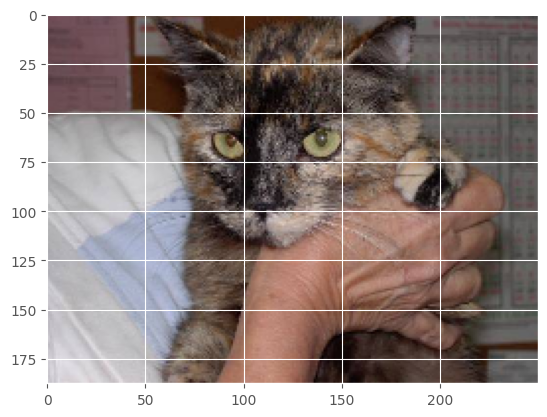

In [29]:
imgr = imgs[78][::2,::2, :]
plt.imshow(imgr)

# Image stitching

We can stitch together multiple images from a crop.

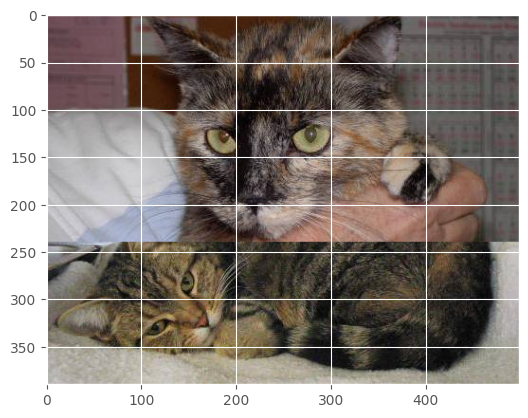

In [32]:
imgis = np.concatenate([imgs[78][:240], imgs[55][-150:]])
plt.imshow(imgis)

Performing more complex image stitching to create a blended effect of images.

In [33]:
imgs[66].shape

(226, 300, 3)

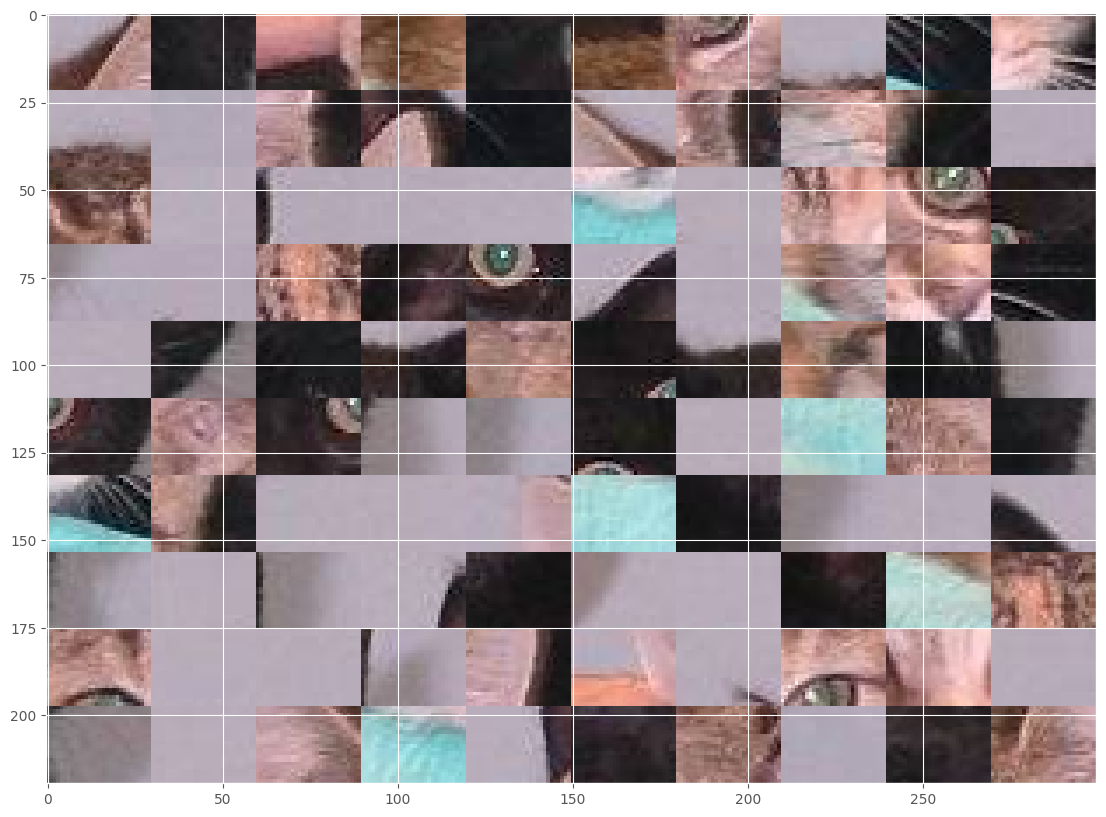

In [35]:
#The shape of the imgs[66] array is (226,300,3),processing of images into a format that can be whole out.
t = imgs[66][6:]
#Define the width and height of each piece of the puzzle
width = 30
height = 22
#Calculate the number of rows and columns of the puzzle
row_num = t.shape[0] // height
col_num = t.shape[1] // width
#Define the list to store all the pieces of the puzzle.
li = []
for row in range(row_num):
    for col in range(col_num):
        li.append(t[row * height:row * height + height, col * width:col * width + width])
np.random.shuffle(li)
#Converts one-dimensional lists into two-dimensional lists for easy merging.
li2 = []
#Iterate over each row, each containing col_num pieces of the puzzle.
for row in range(row_num):
    li2.append(li[row * col_num:row * col_num + col_num])
li3 = []
#Merge all puzzle columns in each row.
for item in li2:
    li3.append(np.concatenate(item, axis=1))
#Merge all rows.
li3 = np.concatenate(li3, axis=0)
plt.figure(figsize=(15, 10))
plt.imshow(li3)




# Image convolution operations

# Embossed effect

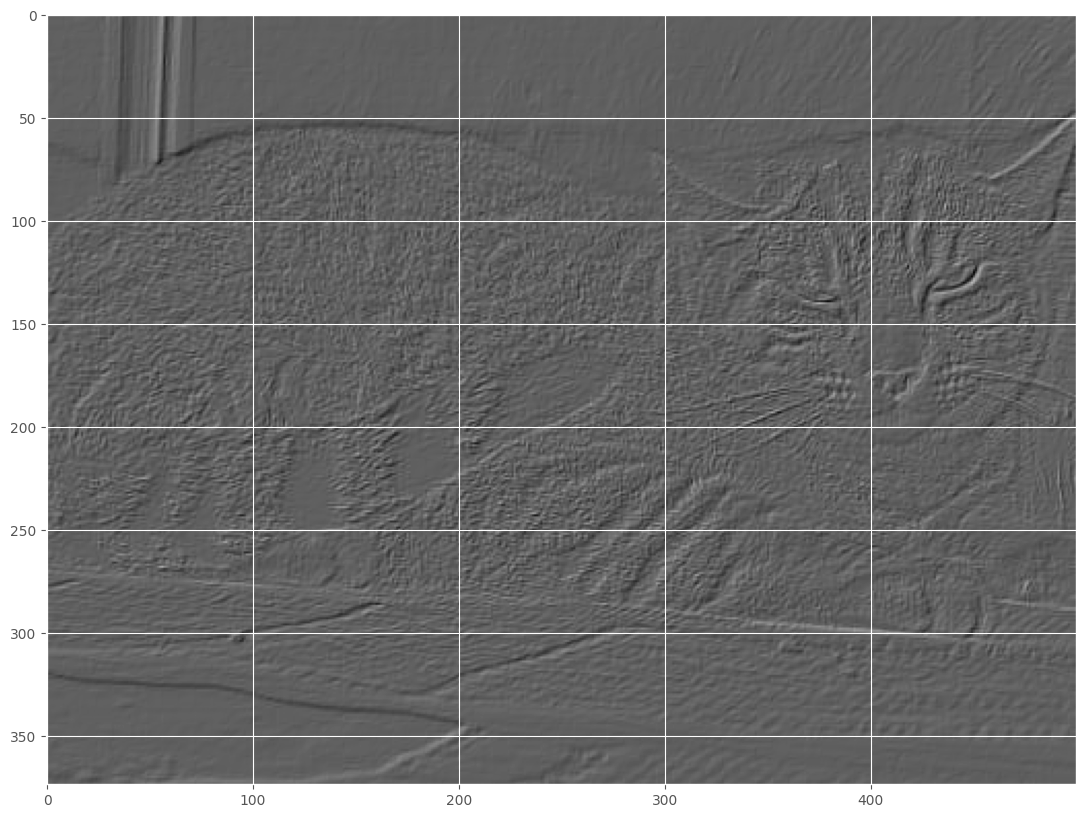

In [37]:
e = np.dot(imgs[77], [0.299, 0.587, 0.114])
kernel = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 0]])
r = np.empty_like(e)
height, width = e.shape[0], e.shape[1]
e = np.pad(e, pad_width=1, mode="constant", constant_values=0)
for row in range(height):
    for col in range(width):
        r[row][col] = np.sum(e[row:row + kernel.shape[0], col:col + kernel.shape[1]] * kernel)
plt.figure(figsize=(15, 10))
plt.imshow(r, cmap="gray")



# Silhouette effect

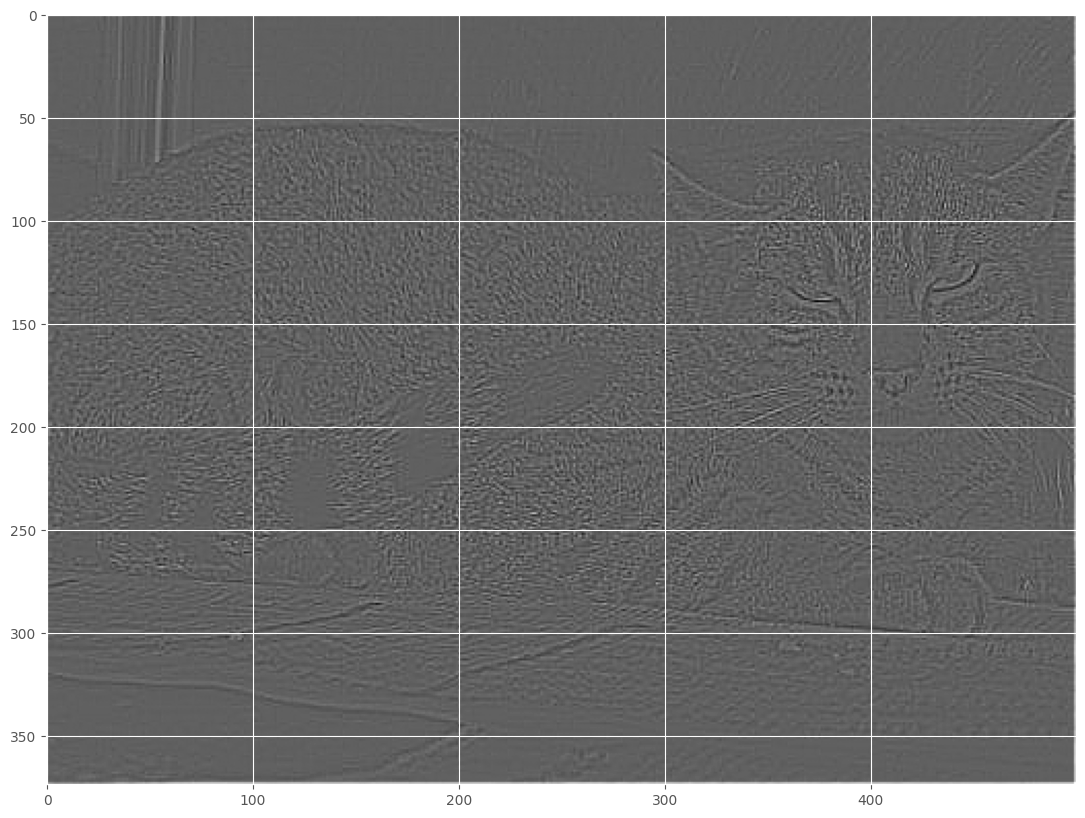

In [43]:
s = np.dot(imgs[77], [0.299, 0.587, 0.114])
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
i = np.empty_like(s)
height, width = s.shape[0], s.shape[1]
s = np.pad(s, pad_width=1, mode="constant", constant_values=0)
for row in range(height):
    for col in range(width):
        i[row][col] = np.sum(s[row:row + kernel.shape[0], col:col + kernel.shape[1]] * kernel)
plt.figure(figsize=(15, 10))
plt.imshow(i, cmap="gray")